![[IND] Banner Tugas Pendahuluan.png](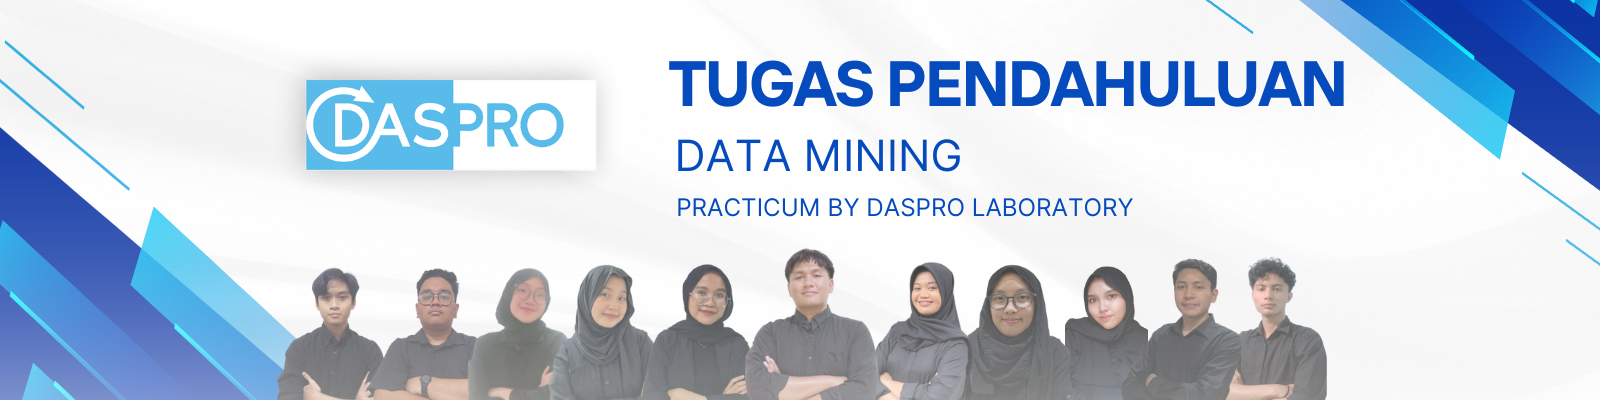)

# **TUGAS PENDAHULUAN MODUL 3**



---

Nama: Syarif Imam Muslim

NIM: 1202220108

Kelas: SI4602

Shift: Shift 8

Kode Asprak: MARK

## **Aturan Pengerjaan dan Pengumpulan Tugas Pendahuluan (TP):**






1. Tugas Pendahuluan dikerjakan secara individu dan diperbolehkan bertanya kepada asisten.
2. Jawaban tidak boleh sama dengan setiap individu.
3. File Python Notebook (.ipynb) yang berisi hasil kerja Tugas Pendahuluan harus diunggah pada modul yang telah disediakan di CeLOE Learning Management System (LMS).
4. Batas pengiriman Tugas Pendahuluan sesuai dengan batas waktu di CeLOE Learning Management System (LMS).
5. Format penamaan file .ipynb ( Python Notebook ):

    **Kode Asisten_TP_MODULX_NAMA LENGKAP (KAPITAL)_NIM.ipynb**

    **FATH_TP_MODUL3_FATHIMAH AZZAHRA_1232220911.ipynb**

6. Tidak mengerjakan akan diberikan nilai 0.
7. Kesalahan format penamaan file praktikum akan mendapatkan potongan nilai sebesar 10%  per file yang salah.
8. Keterlambatan pengiriman file praktikum akan mendapatkan potongan nilai sebesar 50%.
9. Terbukti melakukan kecurangan melalui alat bantu AI (ChatGPT, GitHub Copilot, Dll) baik diluar atau didalam praktikum maka nilai modul = 0.
10. Segala bentuk atau indikasi kecurangan, mencontek, plagiarism, dan/atau pemalsuan akan dibawa ke Komisi Disiplin dan apabila terbukti nilai modul = 0.


# **Penjelasan Studi Kasus**


**Studi Kasus: Klasifikasi Kualitas Buah**

Studi kasus ini bertujuan untuk membangun model prediksi yang dapat memutuskan apakah permohonan kartu kredit seseorang harus disetujui atau ditolak berdasarkan data yang tersedia. Hal ini sangat penting bagi lembaga keuangan atau bank dalam proses otomatisasi penilaian permohonan kartu kredit, mengurangi beban kerja manusia, dan meminimalkan risiko pemberian kredit yang tidak tepat.

Model yang akan dibangun diharapkan dapat memprediksi apakah seseorang akan mendapatkan persetujuan kartu kredit atau tidak berdasarkan sejumlah fitur yang terkait dengan karakteristik pribadi dan status keuangan mereka.

### Dataset

1. Ind_ID: ID klien, digunakan untuk mengidentifikasi pemohon secara unik.
2. Gender: Jenis kelamin pemohon.
4. Car_owner: Menunjukkan apakah pemohon memiliki mobil atau tidak.
5. Propert_owner: Menunjukkan apakah pemohon memiliki properti atau tidak.
6. Children: Jumlah anak yang dimiliki oleh pemohon.
7. Annual_income: Penghasilan tahunan pemohon.
8. Type_Income: Jenis penghasilan (misalnya, gaji tetap, pekerjaan lepas, dll.).
9. Education: Tingkat pendidikan yang dimiliki pemohon (misalnya, SMA, Sarjana, Pasca Sarjana).
10. Marital_status: Status pernikahan pemohon (misalnya, menikah, lajang, dll.).
11. Housing_type: Tipe tempat tinggal (misalnya, rumah sewa, rumah sendiri).
12. Family_Members: Ukuran keluarga pemohon.
13. Label: Status keputusan pengajuan kartu kredit. Nilai 0 menunjukkan aplikasi disetujui, sementara nilai 1 menunjukkan aplikasi ditolak.

## Outline Pengerjaan

1.   Read Data: Membaca data yang akan dipakai untuk dimodelkan
2.   Pre-Modelling: Tahapan sebelum pemodelan, biasanya labelling dan split data, digunakan untuk menentukan target dan pembagian proporsi data latih & data uji
3. Build Model: Membuat model data menggunakan algoritma yang sudah disesuaikan dengan data dan melatihnya
4. Evaluate Model (before tuning): Mengevaluasi hasil prediksi dari model yang sudah dilatih
5. Model Tuning 1: Melakukan optimasi model dengan mencari parameter terbaik
6. Evaluate Model (after tuning 1): Mengevaluasi hasil prediksi dari model yang sudah dituning 1
7. Model Tuning 2: Melakukan Fitur Selection, hanya beberapa fitur saja di latih.
8. Evaluate Model (after tuning 2): Mengevaluasi hasil prediksi dari model yang sudah dituning 2



### 1. Read Data

Pertama, kita akan membaca dan melihat ringkasan statistik dari dataset menggunakan pandas dan menampilkan beberapa baris awal untuk memahami struktur data.

**Hint: library pandas, menggunkan read_csv(), head(), describe(), dan data = df**

In [58]:
import pandas as pd

df = pd.read_csv('dataset_TP_modul3.csv')
data = df
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,label
0,5008827,1,1,1,0,180000.000000,1,1,1,1,2,1
1,5009744,0,1,0,0,315000.000000,0,1,1,1,2,1
2,5009746,0,1,0,0,315000.000000,0,1,1,1,2,1
3,5009749,0,1,0,0,190796.753953,0,1,1,1,2,1
4,5009752,0,1,0,0,315000.000000,0,1,1,1,2,1


Melihat **ringkasan statistik**  data

In [3]:
data.describe()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,label
count,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,5.078979e+06,0.368592,0.401687,0.653472,0.413368,1.907968e+05,1.870214,3.073329,1.435432,1.288774,2.162232,0.110318
std,4.167137e+04,0.482580,0.490398,0.476018,0.777811,1.121136e+05,1.272089,1.346162,0.981261,0.959740,0.948492,0.313387
min,5.008827e+06,0.000000,0.000000,0.000000,0.000000,3.375000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045113e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
50%,5.078924e+06,0.000000,0.000000,1.000000,0.000000,1.710000e+05,3.000000,4.000000,1.000000,1.000000,2.000000,0.000000
75%,5.115671e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,3.000000,4.000000,2.000000,1.000000,3.000000,0.000000
max,5.150412e+06,1.000000,1.000000,1.000000,14.000000,1.575000e+06,3.000000,4.000000,4.000000,5.000000,15.000000,1.000000


### 2. Pre-Modelling

#### Data Balancing

Mengecek distribusi data dari variable Target

**Hint: value_counts()**

In [4]:
data['label'].value_counts()

label
0    1371
1     170
Name: count, dtype: int64

Random UnderSampling

Memisahkan kelas mayoritas dan minoritas

**Hint: mayoritas = 0, minoritas = 1**

In [5]:
mayoritas = data[data['label'] == 0]
minoritas = data[data['label'] == 1]

Melakukan Random Undersampling

**Hint: random_state = 42**

In [6]:
from sklearn.utils import resample

mayoritas_downsampled = resample(mayoritas,
                                 replace=False,
                                 n_samples=len(minoritas),
                                 random_state=42)

data_balanced = pd.concat([mayoritas_downsampled, minoritas])

**Mengabungkan** kembali kelas mayoritas yang sudah di-undersample dengan kelas minoritas

**Hint: concat()**

In [7]:
data_balanced = pd.concat([mayoritas_downsampled, minoritas])

Cek distribusi kelas target setelah balancing

**Hint: value_counts()**

In [8]:
data_balanced['label'].value_counts()

label
0    170
1    170
Name: count, dtype: int64

#### Split Dataset

Memilih fitur yang akan dijadikan target (variabel dependen) yaitu kolom **label** dan fitur yang digunakan untuk melatih model (variabel independen) yaitu **selain kolom label dan Ind_ID**

**Hint: drop()**

In [9]:
y = data_balanced['label']

X = data_balanced.drop(['label', 'Ind_ID'], axis=1)

Split dataset untuk training dan testing, atur size data uji sebanyak **30%**

**Hint: Pisahkan variabel latih dan variabel uji menggunakan function train_test_split serta atur sizenya**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

*Cek* distribusi kelas target pada data latih dan tes

In [11]:
print("Distribusi kelas target pada data latih:")
print(y_train.value_counts())

print("\nDistribusi kelas target pada data tes:")
print(y_test.value_counts())

Distribusi kelas target pada data latih:
label
1    122
0    116
Name: count, dtype: int64

Distribusi kelas target pada data tes:
label
0    54
1    48
Name: count, dtype: int64


### 3. Build Model

Import library yang digunakan

**Hint: sklearn.tree DecisionTreeClassifier**

In [12]:
from sklearn.tree import DecisionTreeClassifier

Melatih model Decision Tree

**Hint: .fit()**

In [13]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Membuat prediksi dari model yang sudah dilatih

**Hint: .predict()**

In [14]:
y_pred = model_dt.predict(X_test)

Tampilkan Grafik dari pohon keputusan

**Hint: tree**

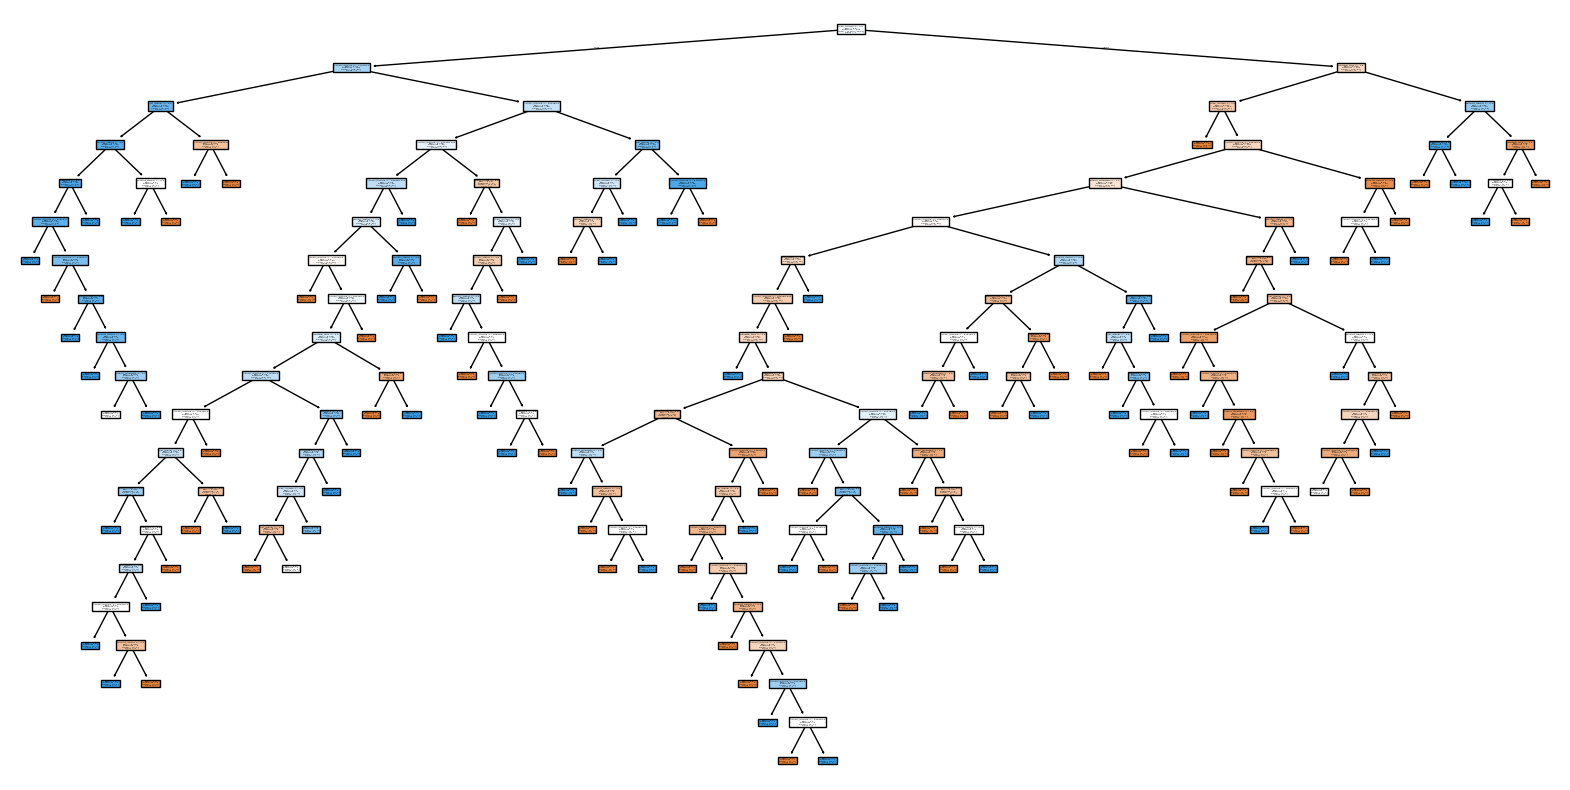

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(model_dt, filled=True, feature_names=X.columns, class_names=['0','1'])
plt.show()

### 4. Evaluate the model (before tuning)

Import library yang digunakan

**Hint: statsmodels.api (sm), numpy (np), sklearn.metrics (accuracy_score, confusion_matrix, classification_report)**

In [16]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Menampilkan akurasi hasil prediksi model

**Hint: accuracy_score()**

In [17]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5980392156862745


Menampilkan confusion matrix hasil prediksi model

**Hint: confusion_matrix()**

In [18]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Confusion Matrix:
 [[31 23]
 [18 30]]


Menampilkan classification report hasil prediksi model

**Hint: classification_report()**

In [19]:
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
#macro tdk liat sample

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.57      0.60        54
           1       0.57      0.62      0.59        48

    accuracy                           0.60       102
   macro avg       0.60      0.60      0.60       102
weighted avg       0.60      0.60      0.60       102



mendapatkan p-value dari model

**Hint: sm.add_constant(), sm.Logit(), logit_model.fit()**

In [20]:
X_train_constant = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_constant)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.651036
         Iterations 5


Menampilkan p-value dari variabel prediktor

**Hint: print(), result.**

In [21]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  238
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           10
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                 0.06032
Time:                        07:23:34   Log-Likelihood:                -154.95
converged:                       True   LL-Null:                       -164.89
Covariance Type:            nonrobust   LLR p-value:                   0.03028
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.0203      1.249     -0.817      0.414      -3.468       1.427
GENDER             0.9072      0.312      2.903      0.004       0.295       1.520
Car_Owner         -0.4078      0.316

Import library yang digunakan untuk ROC

**Hint: sklearn.metrics (roc_curve,roc_auc_score, auc) dan Matplotlib**

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

Membuat Probabilitas prediksi

**Hint: predict_proba()**

In [23]:
y_pred_proba = model_dt.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

Menghitung kurva ROC dan threshold

**Hint: roc_curve()**

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print("Thresholds:")
thresholds

Thresholds:


array([ inf, 1.  , 0.75, 0.5 , 0.  ])

Menghitung AUC

**Hint: auc()**

In [25]:
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

AUC: 0.6070601851851851


Membuat visualisasi dari ROC-AUC

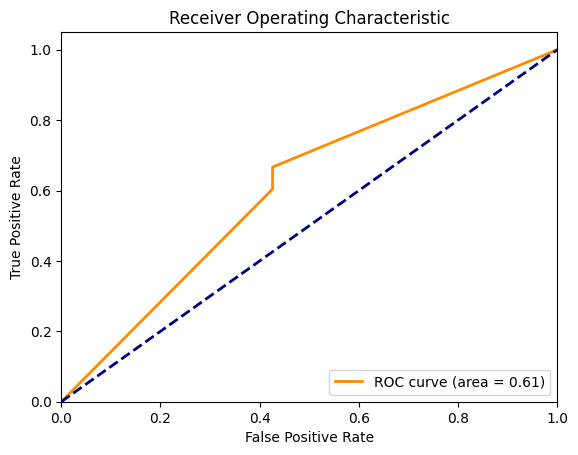

In [26]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 5. Model Tuning 1


Import library yang digunakan

**Hint:sklearn.model_selection (GridSearchCV)**

In [27]:
from sklearn.model_selection import GridSearchCV

Buat parameter grid untuk Decision Tree dengan parameter sebagai berikut:

* criterion dengan nilai 'gini' dan 'entropy'.
* Batasi kedalaman pohon (max_depth) dengan nilai [None, 5, 10, 15, 20].
*min_samples_split pada [2, 5, 10, 20].
* min_samples_leaf pada [1, 2, 5, 10].
* max_features dengan opsi [None, 'sqrt', 'log2'].

**Hint: param_grid = {}**

In [28]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

Inisialisasi model Logistic Regression kembali dan GridSearchCV

**Hint: inisiasi DecisionTreeClassifier()dan GridSearchCV (estimator=..., param_grid=..)**

In [29]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid={'C': [0.1, 1, 10]}, cv=5)

Fit model dengan data training

**Hint: grid_search.fit()**

In [30]:
grid_search_lr.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10]})

### 6. Evaluate the model (after tuning 1)

Tampilkan hasil (parameter dan score) dari Grid Search

**Hint: .best_params_ .best_score_**

In [31]:
print(f"Best parameters: {grid_search_lr.best_params_}")
print(f"Best score: {grid_search_lr.best_score_}")


Best parameters: {'C': 0.1}
Best score: 0.5508865248226951


Evaluasi model terbaik di data uji

**Hint: .best_estimator .predict()**

In [32]:
y_pred_tuned = grid_search_lr.best_estimator_.predict(X_test)

print(f"Accuracy (tuned): {accuracy_score(y_test, y_pred_tuned)}")
print(f"Confusion Matrix (tuned):\n {confusion_matrix(y_test, y_pred_tuned)}")
print(f"Classification Report (tuned):\n {classification_report(y_test, y_pred_tuned)}")

Accuracy (tuned): 0.5784313725490197
Confusion Matrix (tuned):
 [[31 23]
 [20 28]]
Classification Report (tuned):
               precision    recall  f1-score   support

           0       0.61      0.57      0.59        54
           1       0.55      0.58      0.57        48

    accuracy                           0.58       102
   macro avg       0.58      0.58      0.58       102
weighted avg       0.58      0.58      0.58       102



Menampilkan akurasi hasil prediksi model

**Hint: accuracy_score()**

In [33]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5980392156862745


Menampilkan confusion matrix hasil prediksi model

**Hint: confusion_matrix()**

In [34]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Confusion Matrix:
 [[31 23]
 [18 30]]


Menampilkan classification report hasil prediksi model

**Hint: classification_report()**

In [35]:
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.57      0.60        54
           1       0.57      0.62      0.59        48

    accuracy                           0.60       102
   macro avg       0.60      0.60      0.60       102
weighted avg       0.60      0.60      0.60       102



Membuat Probabilitas prediksi

**Hint: predict_proba()**

In [36]:
y_pred_proba_tuned = grid_search_lr.best_estimator_.predict_proba(X_test)[:,1]

Menghitung kurva ROC dan threshold

**Hint: roc_curve()**

In [39]:
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_proba_tuned)

print("Thresholds (tuned):")
thresholds_tuned

roc_auc_tuned = auc(fpr_tuned, tpr_tuned)
print(f"AUC (tuned): {roc_auc_tuned}")

Thresholds (tuned):
AUC (tuned): 0.5931712962962963


Menghitung AUC

**Hint: auc()**

In [37]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {roc_auc}")

AUC: 0.6070601851851851


Membuat visualisasi dari ROC-AUC

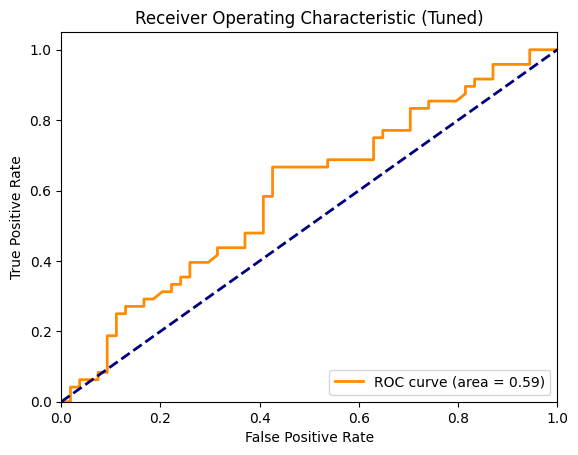

In [40]:
plt.figure()
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_tuned)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Tuned)')
plt.legend(loc="lower right")
plt.show()

### 7. Model Tuning 2


Fitur selection bedasarkan data yang ada pada data X di setiap data train dan test, fitur yang di pilih **'Type_Income', 'EDUCATION', 'Housing_type'**

In [41]:
selected_features = ['Type_Income', 'EDUCATION', 'Housing_type']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_dt_selected = DecisionTreeClassifier(random_state=42)
model_dt_selected.fit(X_train_selected, y_train)

y_pred_selected = model_dt_selected.predict(X_test_selected)

Melatih model Decision Tree menggunakan data X_train yang baru

**Hint: .fit()**

In [42]:
model_dt_selected.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

Membuat prediksi dari model yang sudah dilatih menggunakan data X_test yang baru

**Hint: .predict()**

In [43]:
y_pred_selected = model_dt_selected.predict(X_test_selected)

Tampilkan Grafik dari pohon keputusan

**Hint: tree**

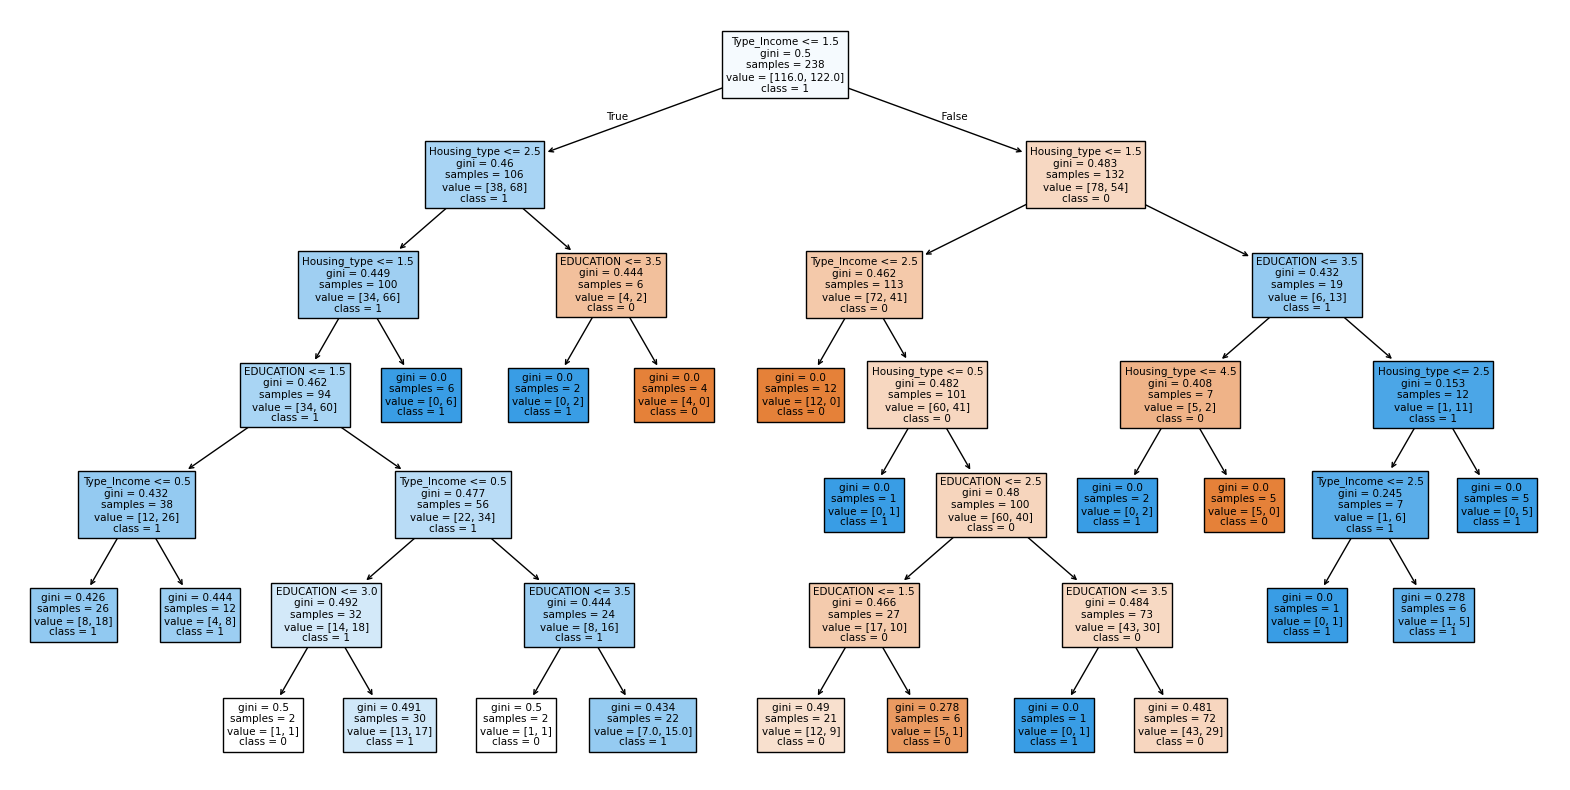

In [44]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_dt_selected, filled=True, feature_names=selected_features, class_names=['0','1'])
plt.show()

#### 8. Evaluate the model (after tuning 2)

Menampilkan akurasi hasil prediksi model

**Hint: accuracy_score()**

In [45]:
print(f"Accuracy (selected features): {accuracy_score(y_test, y_pred_selected)}")

Accuracy (selected features): 0.6372549019607843


Menampilkan confusion matrix hasil prediksi model

**Hint: confusion_matrix()**

In [46]:
print(f"Confusion Matrix (selected features):\n {confusion_matrix(y_test, y_pred_selected)}")

Confusion Matrix (selected features):
 [[36 18]
 [19 29]]


Menampilkan classification report hasil prediksi model

**Hint: classification_report()**

In [47]:
print(f"Classification Report (selected features):\n {classification_report(y_test, y_pred_selected)}")

Classification Report (selected features):
               precision    recall  f1-score   support

           0       0.65      0.67      0.66        54
           1       0.62      0.60      0.61        48

    accuracy                           0.64       102
   macro avg       0.64      0.64      0.64       102
weighted avg       0.64      0.64      0.64       102



Membuat Probabilitas prediksi

**Hint: predict_proba()**

In [48]:
y_pred_proba_selected = model_dt_selected.predict_proba(X_test_selected)[:,1]

Menghitung kurva ROC dan threshold

**Hint: roc_curve()**

In [49]:
fpr_selected, tpr_selected, thresholds_selected = roc_curve(y_test, y_pred_proba_selected)

print("Thresholds (selected features):")
thresholds_selected

Thresholds (selected features):


array([       inf, 1.        , 0.83333333, 0.69230769, 0.68181818,
       0.66666667, 0.56666667, 0.5       , 0.42857143, 0.40277778,
       0.16666667, 0.        ])

Menghitung AUC

**Hint: auc()**

In [50]:
roc_auc_selected = auc(fpr_selected, tpr_selected)
print(f"AUC (selected features): {roc_auc_selected}")

AUC (selected features): 0.6419753086419753


Membuat visualisasi dari ROC-AUC

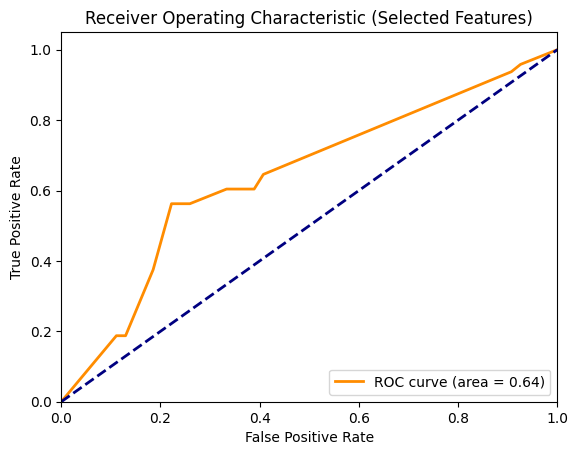

In [51]:
plt.figure()
plt.plot(fpr_selected, tpr_selected, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_selected)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Selected Features)')
plt.legend(loc="lower right")
plt.show()

### **BERIKAN KESIMPULAN BEDASARKAN EVALUASI MODEL BEFORE TUNNING, EVALUASI MODEL AFTER TUNNING 1, dan EVALUASI MODEL AFTER TUNNING 2**

JAWAB:

Berdasarkan evaluasi model sebelum tuning, setelah tuning 1, dan setelah tuning 2, berikut adalah kesimpulan yang dapat diambil:

Evaluasi Model Before TuningConfusion Matrix menunjukkan distribusi prediksi yang cukup seimbang antara kelas positif dan negatif. Dan Classification Report menunjukkan precision, recall, dan f1-score yang cukup baik untuk kedua kelas.

Evaluasi Model After Tuning 1 Confusion Matrix menunjukkan distribusi prediksi yang sedikit lebih baik dibandingkan sebelum tuning. Dan Classification Report menunjukkan peningkatan pada precision, recall, dan f1-score untuk kelas positif, namun sedikit penurunan untuk kelas negatif.

Evaluasi Model After Tuning 2 Confusion Matrix menunjukkan distribusi prediksi yang lebih baik dibandingkan sebelum dan setelah tuning 1. DanClassification Report menunjukkan peningkatan yang signifikan pada precision, recall, dan f1-score untuk kedua kelas.

Secara keseluruhan, model setelah tuning 2 dengan fitur yang dipilih memberikan performa terbaik dengan akurasi dan AUC yang lebih tinggi dibandingkan model sebelum tuning dan setelah tuning 1.

### **DEPLOYMENT**

#####  Pengerjaan Deployment harap mengikuti step step yang ada pada modul dari bagian **Instalasi dan Konfigurasi Tools** (tidak perlu di run)

Install Ngrok

In [ ]:
!pip install pyngrok

Konfigurasikan token

In [ ]:
!ngrok config add-authtoken 2pblGCW43ltUf2nRNc54Z6VEJy9_47fGuGraMERSgaq1buEYb

Install Streamlit

In [ ]:
!pip install streamlit

Import library streamlit

In [ ]:
import streamlit as st

Tamplate Implementasi(Mengerjakan ini dalam satu cell code)

In [60]:
# Import Library yang akan dipakai (JANGAN DI HAPUS, ISI DIBAWAH INI)
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Inisiasi variabel untuk memuat model yang sudah dilatih Gunakan Pickel untuk load model(JANGAN DI HAPUS, ISI DIBAWAH INI)
pickle_in = open('random_forest_model.pkl', 'rb')
classsifier = pickle.load(pickle_in)

# Buat Fungsi yang dapat mengeluarkan hasil prediksi dari model berdasarkan input dari user(JANGAN DI HAPUS, ISI DIBAWAH INI)
def prediction(Gender, Partner, Internet_Service, Streaming_TV, Contract):
    input_data = np.array([[Gender, Partner, Internet_Service, Streaming_TV, Contract]]).astype(np.float64)

    pred = classsifier.predict(input_data)
    proba = classsifier.predict_proba(input_data)

    return pred, proba

# Buat fungsi yang dapat mengeluarkan metrik evaluasi model (JANGAN DI HAPUS, ISI DIBAWAH INI)
def evaluate_model(X_test, y_test):
    y_pred = classsifier.predict(X_test)
    y_pred_proba = classsifier.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return accuracy, precision, recall, f1, roc_auc, y_pred, y_pred_proba

# Buat fungsi untuk membuat visualisasi plot kurva ROC (JANGAN DI HAPUS, ISI DIBAWAH INI)
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    st.pyplot(plt)

# Buat fungsi untuk membuat visualisasi confusion matrix (JANGAN DI HAPUS, ISI DIBAWAH INI)
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    st.pyplot(plt)

# Buat fungsi utama yang akan memuat semua fungsi di atas dan ditampilkan pada Streamlit (JANGAN DI HAPUS, ISI DIBAWAH INI)
def main():
    st.title("DASPRO LABORATORY")
    
    html_temp = """
    <div style ="background-color:darkblue;padding:13px; border-radius:15px; margin-bottom:20px;">
    <h1 style ="color:white; text-align:center;">Telco customer churn Classifier ML App </h1>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    df = pd.read_csv('dataset_jurnal_csv.csv')

    majority = df[df['Churn Label'] == 0]
    minority = df[df['Churn Label'] == 1]
    minority_undersampled = minority.sample(len(minority), random_state=42)
    df = pd.concat([majority, minority_undersampled, minority])

    X = df.drop(['Churn Label'], axis=1)
    y = df['Churn Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy, precision, recall, f1, roc_auc, y_pred, y_pred_proba = evaluate_model(X_test, y_test)

    col1, col2, col3, col4 = st.columns(4)

    with col1:
        st.success(f"Accuracy: {accuracy:.2f}")

    with col2:
        st.info(f"Precision: {precision:.2f}")

    with col3:
        st.warning(f"Recall: {recall:.2f}")

    with col4:
        st.error(f"F1 Score: {f1:.2f}")

    plot_option = st.selectbox("Select the plot to display:", ["Select", "ROC AUC Curve", "Confusion Matrix"])

    if plot_option == "ROC AUC Curve":
        fpr, tpr, roc_auc = roc_curve(y_test, y_pred_proba)
        plot_roc_curve(fpr, tpr, roc_auc)

    elif plot_option == "Confusion Matrix":
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm)

    Gender = st.text_input("Gender")
    Partner = st.text_input("Partner")
    Internet_Service = st.text_input("Internet Service")
    Streaming_TV = st.text_input("Streaming TV")
    Contract = st.text_input("Contract")

    result = ""
    prob_result = ""

    if st.button("Predict"):
        result, proba = prediction(Gender, Partner, Internet_Service, Streaming_TV, Contract)
        prob_result = f"{proba[0]:.2f}"
        result = 'Yes' if result[0] == 1 else 'No'

    st.success(f"Prediksi Churn: {result}")
    st.success(f"Probabilitas Churn: {prob_result}")

if __name__=='__main__':
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'random_forest_model.pkl'

Ekspos Streamlit local kalian ke public menggunakan Ngrok

In [ ]:
from pyngrok import ngrok
import threading
import os

def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(port='8501')
print(f"Streamlit app is live at: {public_url}")

**WAJIB MENGERJAKAN TAMPLATE IMPLEMENTASI DIKARENAKAN AKAN DIGUNAKAN PADA JURNAL PRAKTIKUM!!!!**

